In [64]:
import numpy as np
import math
from typing import Callable
import matplotlib.pyplot as plt
from IPython import display
from sys import exit

# Лаб. 2.
2.1. Реализовать методы простой итерации и Ньютона решения нелинейных уравнений в
виде программ, задавая в качестве входных данных точность вычислений. С
использованием разработанного программного обеспечения найти положительный корень
нелинейного
 уравнения
 (начальное
 приближение
 определить
 графически).
Проанализировать зависимость погрешности вычислений от количества итераций.

#### $$sin x - 2x^2 + 0.5 = 0$$

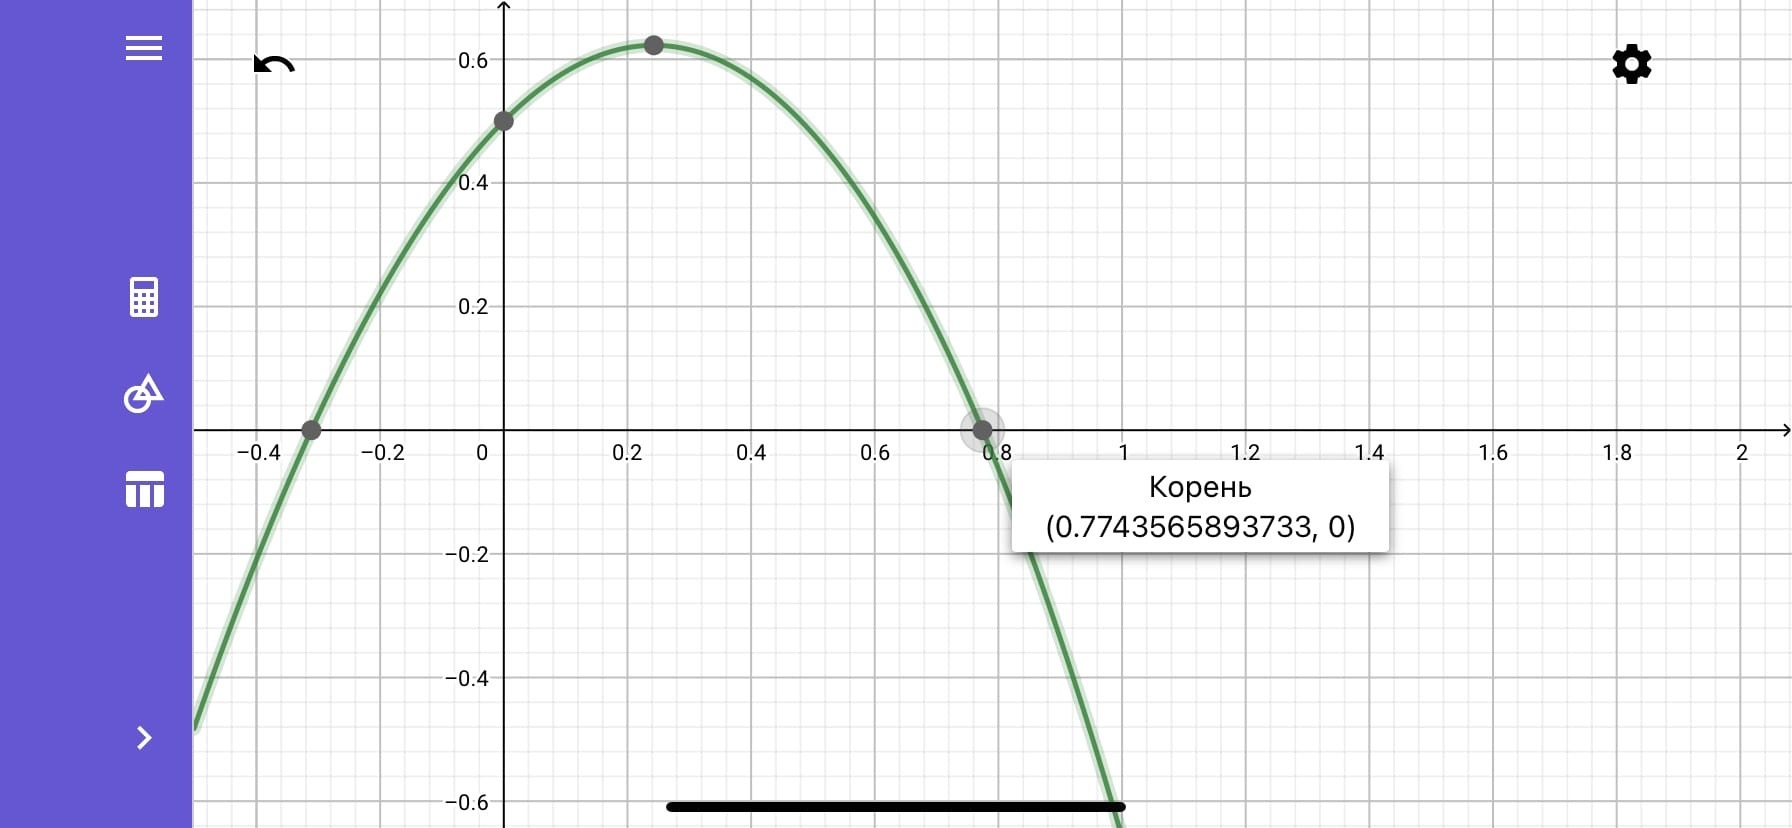

In [65]:
display.Image('iteration_method_func.jpg')

## 1. Метод простой итерации

$x = \phi{(x)}$:

Можно выразить x двумя способами:
$x = arcsin(2x^2 - 0.5)$ или $x = \sqrt{\frac{sinx + 0.5}{2}}$


Условие сходимости метода определяется теоремой:

1) $\phi{(x)} \in [a, b], \forall x \in [a, b]$

2) $\exists q: |\phi'(x)| \leq q < 1, \forall x \in [a, b]$

Рассмотрим интервал (0.75, 0.8). Тогда обоим условиям теоремы удовлетворяет только $\phi(x) = \sqrt{\frac{sinx + 0.5}{2}}$.

In [66]:
def simple_iteration_method(phi: Callable, phi_derivative: Callable, interval: tuple, eps: float) -> list:
    ''' Find a root of a non-linear equation using the simple iteration method. 
        Returns an approximate root of the equation and the number of iterations.'''
    
    q = max([abs(phi_derivative(x)) for x in np.arange(interval[0], interval[1], eps)])
    if q >= 1:
        print('The function doesn\'t meet the second condition of convergence.')
        exit()
    
    x_prev = (interval[0] + interval[1]) / 2
    x_cur = phi(x_prev)

    iters = 0
    while q / (1 - q) * abs(x_cur - x_prev) >= eps:
        x_prev = x_cur
        x_cur = phi(x_prev)
        iters += 1

    return x_cur, iters
        
if __name__ == '__main__':
    phi = lambda x: math.sqrt((math.sin(x) + 0.5) / 2)
    phi_derivative = lambda x: math.cos(x) / (4 * math.sqrt((math.sin(x) + 0.5) / 2))
    eps = 0.0000001
    interval = (0.75, 0.8)
    root, iter_count = simple_iteration_method(phi, phi_derivative, interval, eps)
    print(f'Root: {root}, iterations: {iter_count}')

Root: 0.7743566157694397, iterations: 6


## 2. Метод Ньютона

Условия сходимости метода: \
Пусть на отрезке $[a, b]$ $f(x)$ имеет первую и вторую производные постоянного знака и пусть $f(a)f(b)<0$.

Тогда, если начальное приближение $x^0$ выбрано на $[a, b]$ так, что $f(x^0)f''(x^0)>0$, то начатая с неё последовательность ${x^k}$, где $$x^{k+1} = x^k - \frac{f(x^k)}{f'(x^k)}$$ \
монотонно сходится к корню $x^\ast \in (a, b)$ уравнения $f(x) = 0$.

Я выбрал начальное приближение в точке $x^0 = 0.8$, так как в выбранном интервале над осью OY вторая производная отрицательна, и мы получаем $f(x^0)f''(x^0)<0$. Это не удовлетворяет условию сходимости метода.

In [67]:
def Newton_method(f: Callable, f_first_derivative: Callable, f_second_derivative: Callable, start_x: float, eps: float) -> list:
    ''' Find a root of a non-linear equation using the Newton method. 
        Returns an approximate root of the equation and the number of iterations.'''
    iters = 0
    x_prev = start_x
    x_cur = x_prev - f(x_prev) / f_first_derivative(x_prev)
    iters = 1

    while abs(x_cur - x_prev) >= eps:
        x_prev = x_cur
        x_cur = x_prev - f(x_prev) / f_first_derivative(x_prev)
        
        if abs(x_cur - x_prev)<= eps:
            return x_cur, iters
        iters += 1
        
if __name__ == '__main__':
    f = lambda x: math.sin(x) - 2 * x**2 + 0.5
    f_first_derivative = lambda x: math.cos(x) - 4*x
    f_second_derivative = lambda x: -math.sin(x) - 4
    eps = 0.0000001
    start_x = 0.8
    root, iter_count = Newton_method(f, f_first_derivative, f_second_derivative, start_x, eps)
    print(f'Root: {root}, iterations: {iter_count}')

Root: 0.7743565933388374, iterations: 3


2.2. Реализовать методы простой итерации и Ньютона решения систем нелинейных
уравнений в виде программного кода, задавая в качестве входных данных точность
вычислений. С использованием разработанного программного обеспечения решить
систему нелинейных уравнений (при наличии нескольких решений найти то из них, в
котором значения неизвестных являются положительными); начальное приближение
определить графически. Проанализировать зависимость погрешности вычислений от
количества итераций.

$$ x_1 - cos x_2 = 1$$
$$ x_2 - sin x_1 = 1$$

## 1. Метод простой итерации для систем нелинейных уравнений

Выражаем $x_1$ и $x_2$
$$x_1 = 1 + cos x_2 = \phi_1(x_1, x_2)$$
$$x_2 = 1 + sin x_1 = \phi_2(x_1, x_2)$$

Матрица Якоби для проверки достаточного условия сходимости: 
$$ \phi'(x) = 
\begin{bmatrix}
    0       & -sinx_2 \\
    cosx_1  & 0 \\
\end{bmatrix}
$$

Метод простых итераций сходится к решению системы, если какая-либо норма матрицы Якоби меньше единицы на каждой итерации.

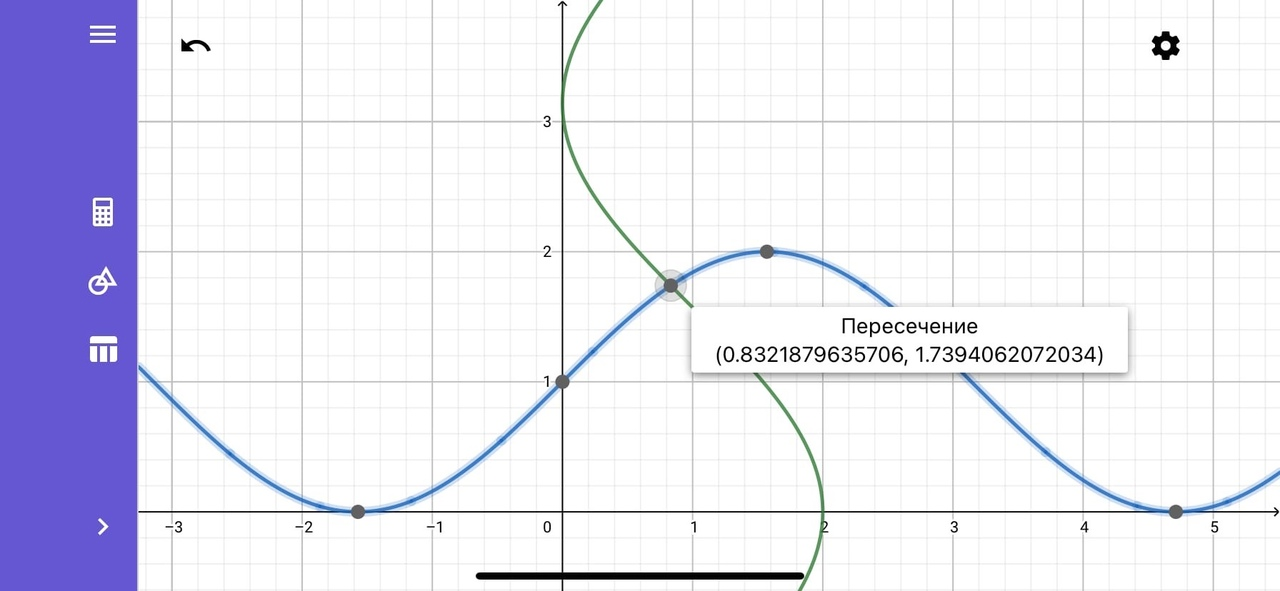

In [68]:
display.Image('for_system.jpg')

In [69]:
def convergence_check_phi(Jacobi_matrix: list, x: tuple) -> bool:
    Jacobi_matrix_x = [[phi(*x) for phi in row] for row in Jacobi_matrix]
    max_norm = max([np.linalg.norm(col) for col in np.array(Jacobi_matrix_x).T])
    if max_norm < 1:
        return True
    return False

def simple_iteration_method_for_systems(phi_array: tuple, Jacobi_matrix: list, start_point: list, eps: float) -> list:
    ''' Find a root point of the system of non-linear equations using the simple iteration method. 
        Returns an approximate root and the number of iterations.'''
    if not convergence_check_phi(Jacobi_matrix, start_point):
        print('The condition of convergence hasn\'t been satistied.')
        exit()
    x_prev = start_point.copy()
    x_cur = [phi_array[i](*x_prev) for i in range(len(x_prev))]
    
    iters = 0
    while np.linalg.norm(np.array(x_prev) - np.array(x_cur)) >= eps:
        if not convergence_check_phi(Jacobi_matrix, x_cur):
            print('The condition of convergence hasn\'t been satistied.')
            exit()
        x_prev = x_cur.copy()
        x_cur = [phi_array[i](*x_prev) for i in range(len(x_prev))]
        iters += 1
    
    return x_cur, iters

if __name__ == '__main__':
    start_point = [0.8, 1.7]
    
    phi_array = (lambda x1, x2: 1 + math.cos(x2), lambda x1, x2: 1 + math.sin(x1))
    
    Jacobi_matrix = [
        [lambda x1, x2: 0, lambda x1, x2: -math.sin(x2)],
        [lambda x1, x2: math.cos(x1), lambda x1, x2: 0]                
    ]
    eps = 0.000001
    
    root, iter_count = simple_iteration_method_for_systems(phi_array, Jacobi_matrix, start_point, eps)
    print(f'Root: {root}, iterations: {iter_count}')

Root: [0.8321875850090441, 1.7394057760601038], iterations: 55


## 2. Метод Ньютона для систем нелинейных уравнений

$$f_1(x) = x_1 - cosx_2 - 1$$
$$f_2(x) = x_2 - sinx_1 - 1$$

Матрица Якоби для данной системы:

$$ J(x) = 
\begin{bmatrix}
    1       & sinx_2 \\
    -cosx_1  & 1 \\
\end{bmatrix}
$$

Условия сходимости: дифференцируемость функций $f_1(x), f_2(x)$ и $det J(x^k) \neq 0$

In [70]:
def convergence_check_f(Jacobi_matrix: list, x: tuple) -> bool:
    Jacobi_matrix_x = [[df_i(*x) for df_i in row] for row in Jacobi_matrix]
    if np.linalg.det(Jacobi_matrix_x) != 0:
        return True
    return False

def Newton_method_for_systems(f_array: tuple, Jacobi_matrix: list, start_point: list, eps: float) -> list:
    ''' Find a root point of the system of non-linear equations using Newton's method. 
        Returns an approximate root and the number of iterations.'''

    x_cur = np.array(start_point)
    iters = 0
    while True:
        if not convergence_check_f(Jacobi_matrix, x_cur):
            print('The condition of convergence hasn\'t been satistied: Jacobi matrix is not invertible.')
            exit()

        f_array_cur = np.array([f_i(*x_cur.tolist()) for f_i in f_array])
        Jacobi_matrix_cur = [[df_i(*x_cur.tolist()) for df_i in row] for row in Jacobi_matrix]

        # J(x^k) * delta(x^k) = -f(x^k), solve with respect to delta(x^k)
        delta_x_k = np.linalg.solve(Jacobi_matrix_cur, -f_array_cur)

        # delta(x^k) = x^(x+1) - x^k, so we get x^(k+1) from this equation
        x_next = delta_x_k + x_cur
        iters += 1
        if np.linalg.norm(x_next - x_cur) < eps:
            return x_next.tolist(), iters
        x_cur = np.copy(x_next)

if __name__ == '__main__':
    start_point = [0.8, 1.7]
    
    f_array = (lambda x1, x2: x1 - math.cos(x2) - 1, lambda x1, x2: x2 - math.sin(x1) - 1)
    
    Jacobi_matrix = [
        [lambda x1, x2: 1, lambda x1, x2: math.sin(x2)],
        [lambda x1, x2: -math.cos(x1), lambda x1, x2: 1]                
    ]
    eps = 0.000001
    
    root, iter_count = Newton_method_for_systems(f_array, Jacobi_matrix, start_point, eps)
    print(f'Root: {root}, iterations: {iter_count}')

Root: [0.8321879221460019, 1.7394061793139048], iterations: 3
